In [1]:
#!/usr/bin/python
import warnings
import datetime
import numpy as np
import pandas as pd
import pandas_datareader.data as pdr
import matplotlib.pyplot as plt
import corr_helpers
warnings.simplefilter('ignore', FutureWarning)

In [2]:
date_from = datetime.date(2017, 1, 1)
date_to = datetime.date(2022, 2, 18)
tickerList = ['SPY', 'VGT']
multiData = corr_helpers.getMultiAssetData(tickerList, date_from, date_to)

# use pivot to reshape DataFrame with only Close
ClosePrice = multiData[['Close']]
ClosePrice = ClosePrice.reset_index()
ClosePriceTable = ClosePrice.pivot(index='Date', columns='Ticker', values='Close')

In [3]:
BondUS = pdr.DataReader('BND.US', "stooq", date_from, date_to).sort_index()
df = pd.concat([ClosePriceTable, BondUS['2017-1-1':'2022-02-18']['Close']], axis=1)
df.columns = ['SPY', 'VGT', 'US Bond']

In [4]:
df.tail()

,SPY,VGT,US Bond
Date,,,
2022-02-14,439.019989,405.890015,81.27
2022-02-15,446.100006,417.579987,81.10
2022-02-16,446.600006,416.839996,81.21
2022-02-17,437.059998,403.130005,81.39
2022-02-18,434.230011,398.089996,81.53


In [5]:
df.describe()

,SPY,VGT,US Bond
count,1293.000000,1293.000000,1293.000000
mean,315.297989,248.177486,80.107779
std,69.016853,96.015738,5.192534
min,222.949997,122.459999,72.725000
25%,266.019989,173.970001,74.821000
50%,290.089996,212.320007,80.329000
75%,353.209991,326.820007,85.230000
max,477.709991,466.100006,88.496000


In [6]:
# calculate daily percent change and 21 days rolling percent change
rolling_pct_change = df.pct_change().rolling(21).sum().fillna(0)
rolling_pct_change.tail()

,SPY,VGT,US Bond
Date,,,
2022-02-14,-0.054576,-0.053473,-0.030113
2022-02-15,-0.038858,-0.032742,-0.026713
2022-02-16,-0.020028,-0.008999,-0.019115
2022-02-17,-0.031006,-0.027945,-0.019314
2022-02-18,-0.026413,-0.028011,-0.018679


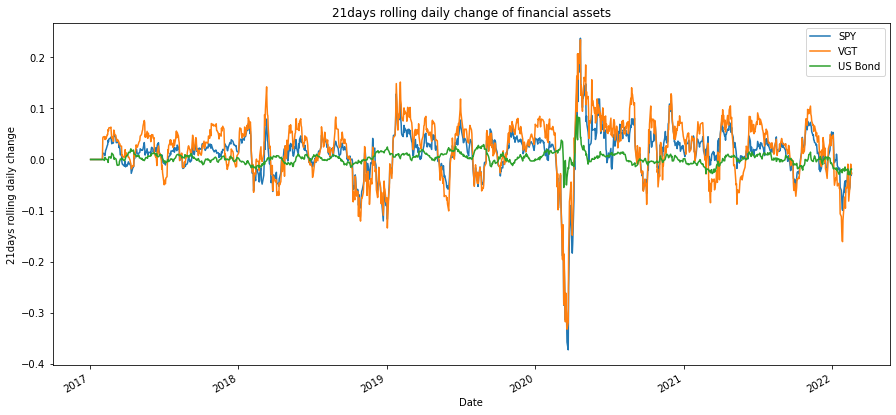

In [7]:
%matplotlib inline
fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(1, 1, 1)
rolling_pct_change.plot(ax=ax1)
ax1.set_xlabel('Date')
ax1.set_ylabel('21days rolling daily change')
ax1.set_title('21days rolling daily change of financial assets')
plt.show()

In [8]:
# calculate daily percent change and 21 days rolling standard deviation
rolling_std = df.pct_change().rolling(21).std().fillna(0)
rolling_std.tail()

,SPY,VGT,US Bond
Date,,,
2022-02-14,0.013520,0.020396,0.004041
2022-02-15,0.014117,0.021412,0.003937
2022-02-16,0.013649,0.020699,0.003805
2022-02-17,0.014226,0.021706,0.003796
2022-02-18,0.014106,0.021708,0.003815


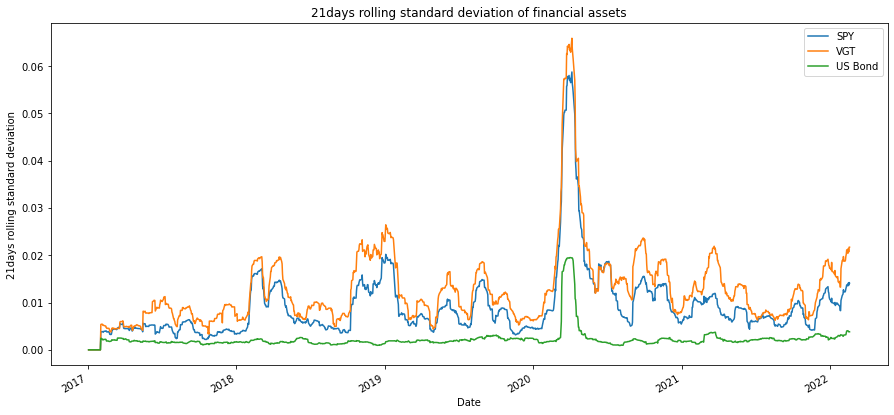

In [9]:
%matplotlib inline
fig = plt.figure(figsize=(15, 7))
ax2 = fig.add_subplot(1, 1, 1)
rolling_std.plot(ax=ax2)
ax2.set_xlabel('Date')
ax2.set_ylabel('21days rolling standard deviation')
ax2.set_title('21days rolling standard deviation of financial assets')
plt.show()

In [10]:
# calculate daily percent change and 21 days correlations with DowJones
df_ = df.pct_change().rolling(21)
correlation_change = rolling_pct_change.copy()
correlation_change['US Bond'] = df_['SPY'].corr(df['US Bond'].pct_change().fillna(0))
correlation_change['VGT'] = df_['SPY'].corr(df['VGT'].pct_change().fillna(0))
correlation_change.drop('SPY', axis=1, inplace=True) # SPY was the key
correlation_change.tail()

,VGT,US Bond
Date,,
2022-02-14,0.975121,0.045146
2022-02-15,0.978841,0.041986
2022-02-16,0.976128,-0.029991
2022-02-17,0.978102,-0.058974
2022-02-18,0.978075,-0.053705


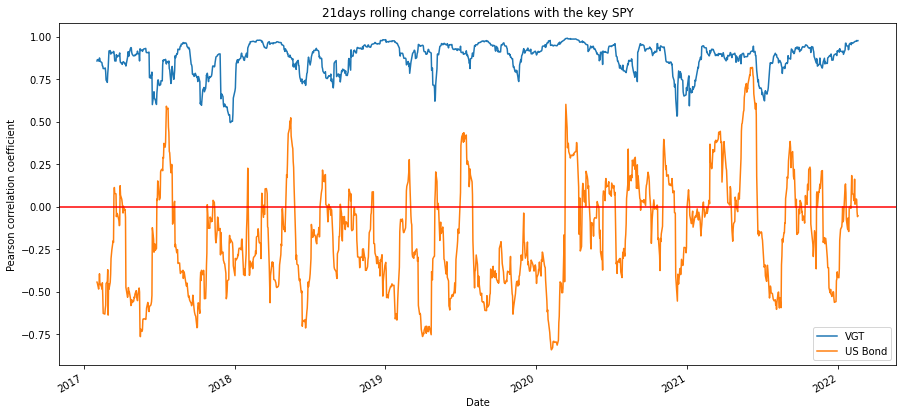

In [11]:
%matplotlib inline
fig = plt.figure(figsize=(15, 7))
ax3 = fig.add_subplot(1, 1, 1)

correlation_change[['VGT','US Bond']].plot(ax=ax3)
ax3.set_xlabel('Date')
ax3.set_ylabel('Pearson correlation coefficient')
ax3.set_title('21days rolling change correlations with the key SPY')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()